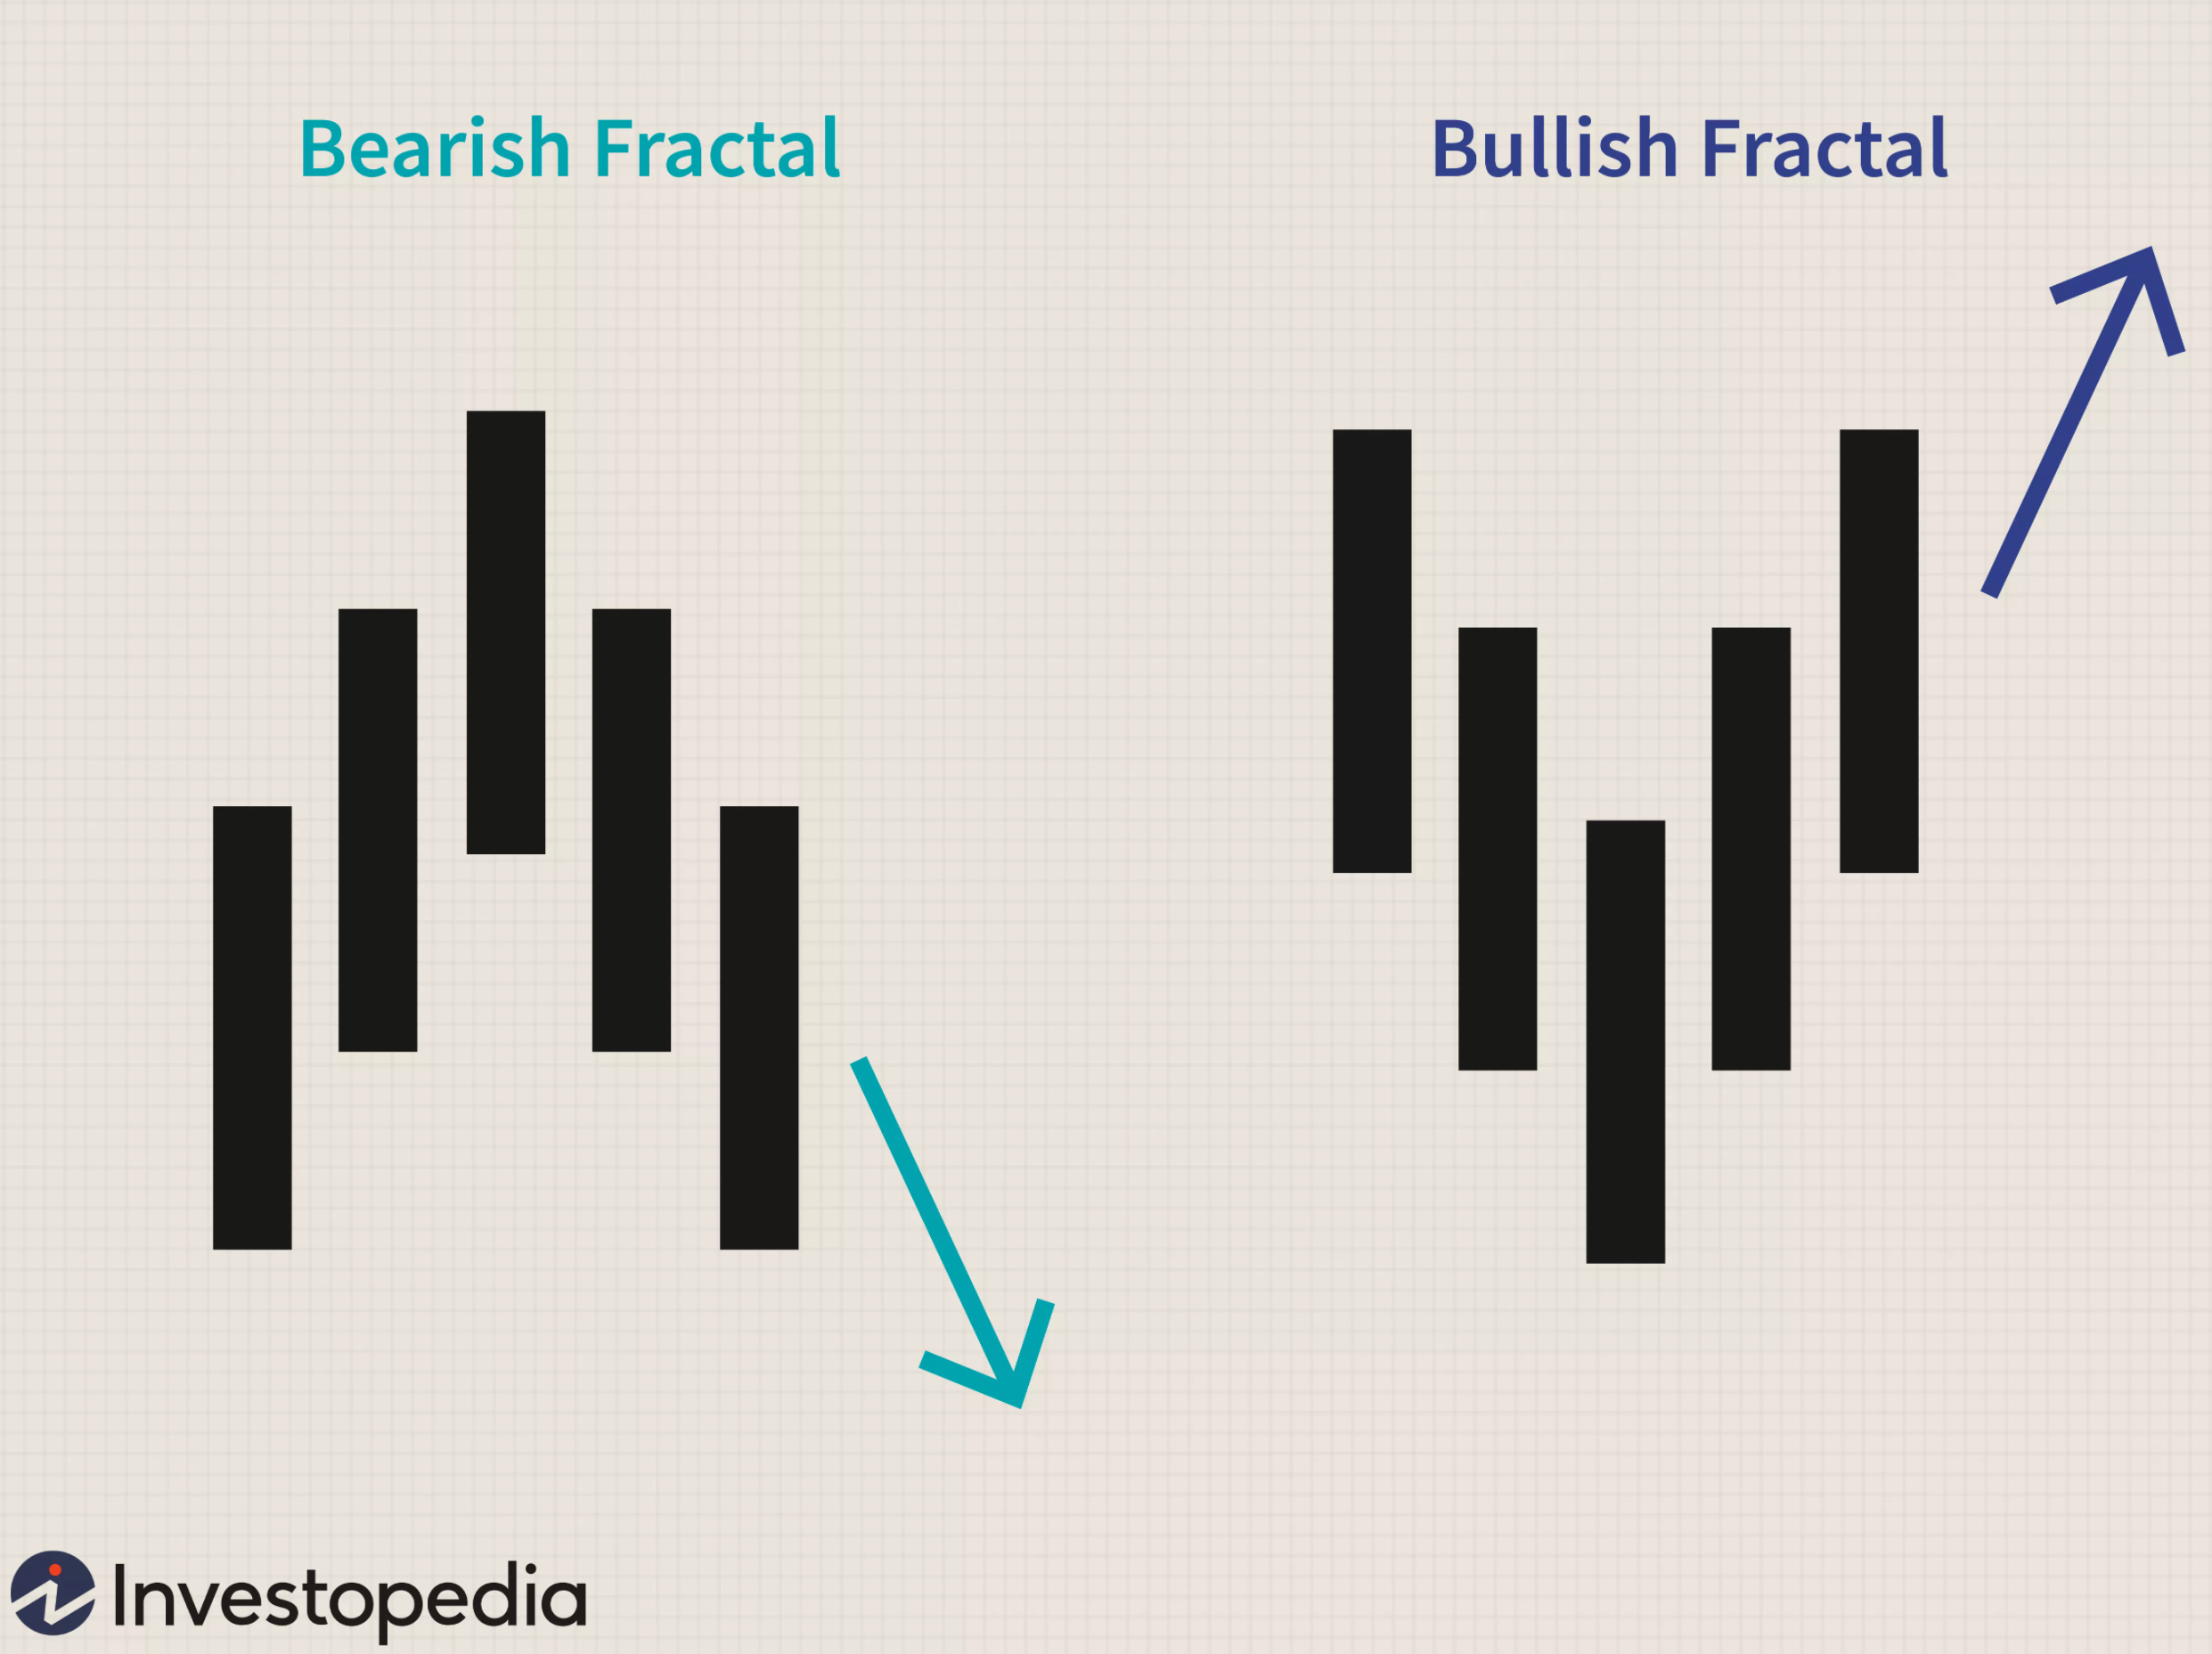

In [1]:
# We recognize a support or a resistance by fractal
from IPython.display import Image
Image('fractal.png',width=400,height=300)

In [2]:
# To test a support, it must have 2 higher lows before and 2 higher lows after

def isSupport(df, i):
    
    support = df.iloc[i]['Low'] < df.iloc[i-1]['Low'] and \
    df.iloc[i]['Low'] < df.iloc[i+1]['Low'] and \
    df.iloc[i+1]['Low'] < df.iloc[i+2]['Low'] and \
    df.iloc[i-1]['Low'] < df.iloc[i-2]['Low']
    
    return support  # a boolean return

In [3]:
# To test a resistance, it must have 2 lower highs before and 2 lower highs after

def isResistance(df,i):
    
    resistance = df.iloc[i]['High'] > df.iloc[i-1]['High'] and \
    df.iloc[i]['High'] > df.iloc[i+1]['High'] and \
    df.iloc[i+1]['High'] > df.iloc[i+2]['High'] and \
    df.iloc[i-1]['High'] > df.iloc[i-2]['High']

    return resistance  # a boolean return

In [4]:
import pandas as pd
df = pd.read_csv('concordia_toyproblem.csv')
df = df[['Date','Close', 'Open', 'Low', 'High', 'Support', 'Resistance']]

In [5]:
df.head()

,Date,Close,Open,Low,High,Support,Resistance
0,2020-04-09,16.82,17.94,16.50,18.69,NaN,NaN
1,2020-04-08,17.32,16.50,16.40,17.53,NaN,NaN
2,2020-04-07,16.40,16.61,16.34,17.07,NaN,NaN
3,2020-04-06,15.77,16.05,15.18,16.10,NaN,NaN
4,2020-04-03,15.34,16.30,14.93,16.36,NaN,NaN


In [6]:
df.tail()

,Date,Close,Open,Low,High,Support,Resistance
1038,2016-01-29,4.84,4.70,4.52,4.86,NaN,NaN
1039,2016-01-28,4.60,4.67,4.35,5.13,NaN,NaN
1040,2016-01-27,4.57,4.22,4.16,4.64,NaN,NaN
1041,2016-01-26,4.20,4.23,4.12,4.31,NaN,NaN
1042,N,13.04,13.05,12.84,13.26,NaN,NaN


In [7]:
# Notice that the date is in reversed order

supports = []  # Make an emptylist to store supports
resistances = []  # Make an emplist to store resistances

for i in reversed(range(len(df) - 2)):  # We have to compare low or high 2 days before
    
    if i < 2:  # We have to compare low or high 2 days after
        break
    
    if isSupport(df, i):
        supports.append((i, df.iloc[i]['Low']))
        df.loc[df.index[i], 'Support' ] = 'S'
    elif isResistance(df, i):
        resistances.append((i, df.iloc[i]['High']))
        df.loc[df.index[i], 'Resistance'] = 'R'
        

In [8]:
df.head(10)

,Date,Close,Open,Low,High,Support,Resistance
0,2020-04-09,16.82,17.94,16.50,18.69,NaN,NaN
1,2020-04-08,17.32,16.50,16.40,17.53,NaN,NaN
2,2020-04-07,16.40,16.61,16.34,17.07,NaN,NaN
3,2020-04-06,15.77,16.05,15.18,16.10,NaN,NaN
4,2020-04-03,15.34,16.30,14.93,16.36,NaN,NaN
5,2020-04-02,15.51,15.40,15.01,16.55,NaN,R
6,2020-04-01,14.30,13.45,13.32,14.55,NaN,NaN
7,2020-03-31,13.99,13.60,13.60,14.54,NaN,NaN
8,2020-03-30,13.38,13.15,12.83,13.74,NaN,NaN
9,2020-03-27,13.30,13.30,13.25,13.69,NaN,NaN


In [9]:
df.tail(10)

,Date,Close,Open,Low,High,Support,Resistance
1033,2016-02-05,4.54,4.73,4.53,4.78,NaN,NaN
1034,2016-02-04,4.73,4.56,4.36,4.94,NaN,NaN
1035,2016-02-03,4.49,4.42,4.22,4.52,S,NaN
1036,2016-02-02,4.30,4.56,4.30,4.65,NaN,NaN
1037,2016-02-01,4.72,4.74,4.66,4.86,NaN,NaN
1038,2016-01-29,4.84,4.70,4.52,4.86,NaN,NaN
1039,2016-01-28,4.60,4.67,4.35,5.13,NaN,NaN
1040,2016-01-27,4.57,4.22,4.16,4.64,NaN,NaN
1041,2016-01-26,4.20,4.23,4.12,4.31,NaN,NaN
1042,N,13.04,13.05,12.84,13.26,NaN,NaN


In [10]:
df.to_excel('output.xlsx')